In [1]:
# Objective:
# The objective of this analysis is to examine historical trends, volatility, 
# and trading volumes in stock and cryptocurrency markets. By leveraging Power BI 
# for visualization and Python for data processing, this project aims to provide insights
# into key price movements, trading volumes, and market behavior over time. Specifically,
# the analysis seeks to identify patterns that can support investment decisions,
# highlight periods of high volatility, and reveal comparative performance between stocks and cryptocurrencies.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# from pptx import Presentation
# from pptx.util import Inches, Pt


In [18]:
file_path = "C:/Users/Ashwin/Downloads/Source-20241025T071548Z-001/Source/combined_data.xlsx" 
data = pd.read_excel(file_path)
first_five_rows = data.head(5)
print(first_five_rows)

        Date    Open    High     Low   Close    Adj Close    Volume Symbol  \
0 2018-12-31  1662.0  1723.0  1647.0  1676.0  1488.768555  383424.0   SQQQ   
1 2019-01-02  1779.0  1783.0  1623.0  1650.0  1465.673096  447528.0   SQQQ   
2 2019-01-03  1724.0  1824.0  1704.0  1813.0  1610.463745  591180.0   SQQQ   
3 2019-01-04  1728.0  1745.0  1553.0  1575.0  1399.051392  623197.0   SQQQ   
4 2019-01-07  1567.0  1583.0  1500.0  1525.0  1354.637207  316521.0   SQQQ   

   Year Date Category Formatted Date   New_Date  Type Logo  
0  2018           Max           2018 2018-12-31  ETFs  NaN  
1  2019           Max           2019 2019-01-02  ETFs  NaN  
2  2019           Max           2019 2019-01-03  ETFs  NaN  
3  2019           Max           2019 2019-01-04  ETFs  NaN  
4  2019           Max           2019 2019-01-07  ETFs  NaN  


In [19]:
last_five_rows = data.tail(5)
print(last_five_rows)

            Date  Open  High  Low  Close  Adj Close  Volume     Symbol  Year  \
68911 2020-09-20   NaN   NaN  NaN    NaN        NaN     NaN   AVAX-USD  2020   
68912 2020-09-21   NaN   NaN  NaN    NaN        NaN     NaN   AVAX-USD  2020   
68913 2023-09-18   NaN   NaN  NaN    NaN        NaN     NaN  FDUSD-USD  2023   
68914 2023-09-19   NaN   NaN  NaN    NaN        NaN     NaN  FDUSD-USD  2023   
68915 2023-09-20   NaN   NaN  NaN    NaN        NaN     NaN  FDUSD-USD  2023   

      Date Category       Formatted Date   New_Date    Type  \
68911            5Y                 2020 2020-09-20  Crypto   
68912            5Y                 2020 2020-09-21  Crypto   
68913            1Y  2023-09-01 00:00:00 2023-09-18  Crypto   
68914            1Y  2023-09-01 00:00:00 2023-09-19  Crypto   
68915            1Y  2023-09-01 00:00:00 2023-09-20  Crypto   

                                          Logo  
68911   https://i.postimg.cc/sDy3G46m/5805.png  
68912   https://i.postimg.cc/sDy3G46m/5805

In [21]:
# Conclusion:The Stock Data Analysis Dashboard shows trends in stock and crypto data over various years. 
# This analysis includes historical trends, trading volumes, and closing prices for stocks and cryptos.
# Data insights highlight maximum and minimum values within categories, useful for identifying 
# trends over time.


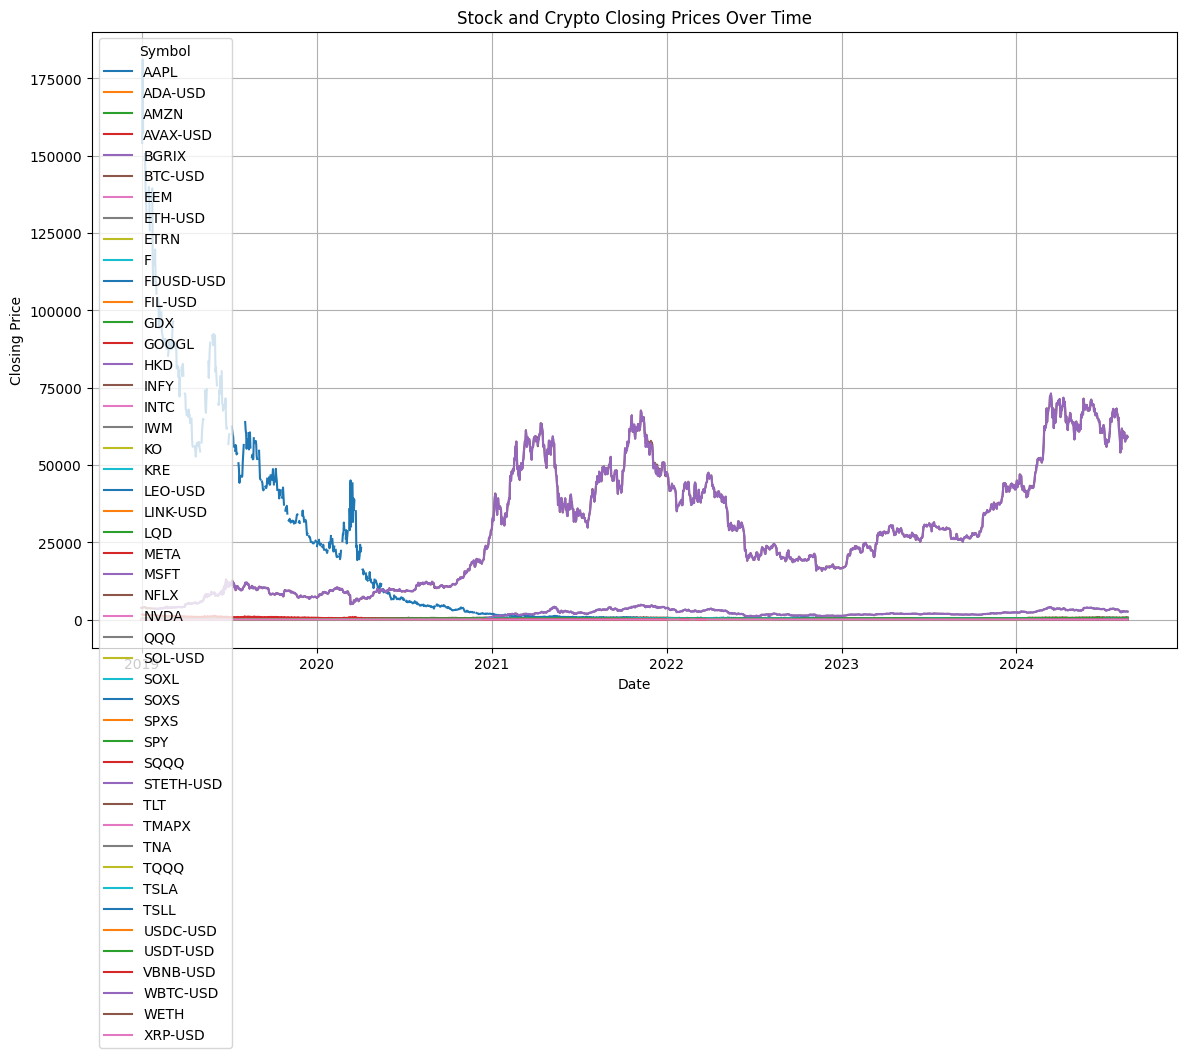

In [26]:
data['Date'] = pd.to_datetime(data['Date'])
pivot_data = data.pivot(index='Date', columns='Symbol', values='Close')
plt.figure(figsize=(14, 8))
for symbol in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[symbol], label=symbol)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock and Crypto Closing Prices Over Time")
plt.legend(title="Symbol")
plt.grid(True)
plt.show()

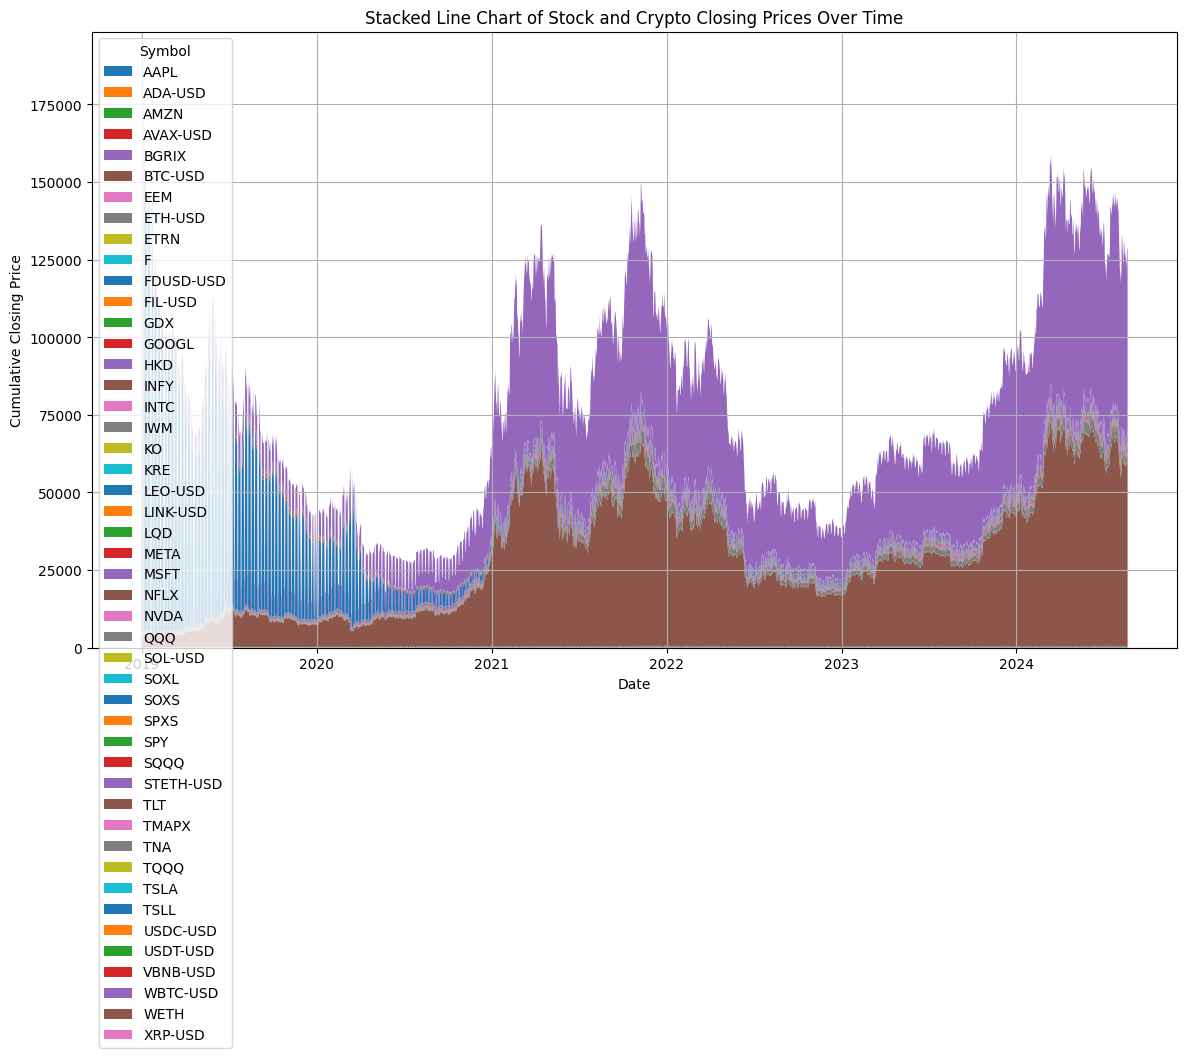

In [28]:
data['Date'] = pd.to_datetime(data['Date'])

# Pivot the data to have 'Date' as index and each 'Symbol' as a column of closing prices
pivot_data = data.pivot(index='Date', columns='Symbol', values='Close')

# Replace NaN values with 0 to avoid stacking issues with missing data
pivot_data = pivot_data.fillna(0)

# Plotting stacked line chart
plt.figure(figsize=(14, 8))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Cumulative Closing Price")
plt.title("Stacked Line Chart of Stock and Crypto Closing Prices Over Time")
plt.legend(title="Symbol", loc="upper left")
plt.grid(True)
plt.show()

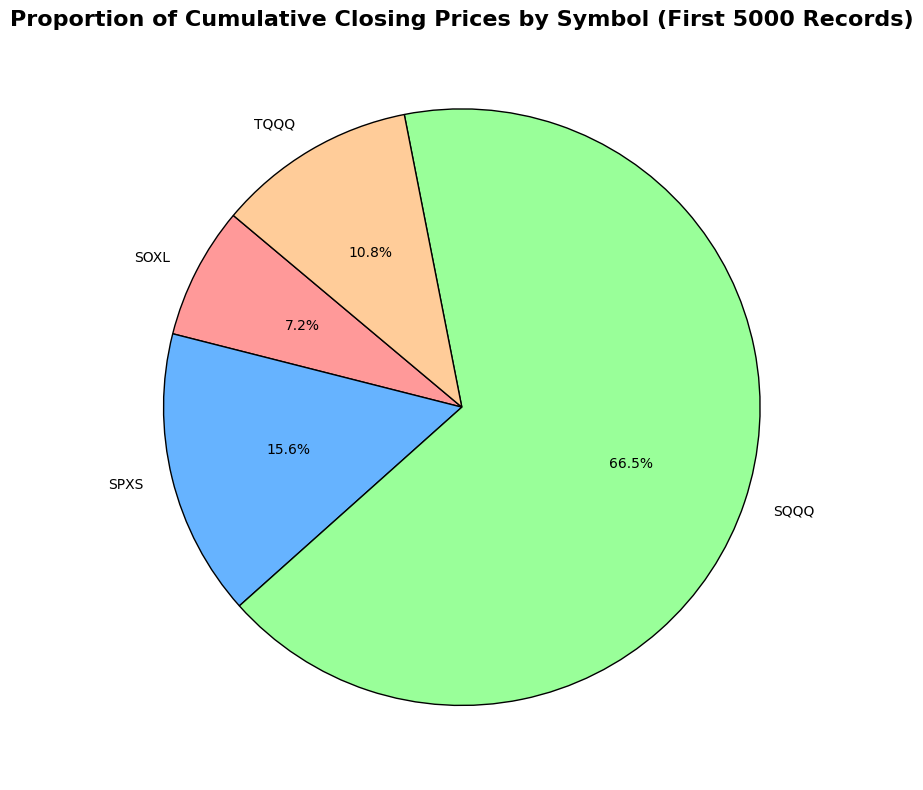

In [38]:
data_limited = data.head(5000)

# Calculate total closing price per symbol for the limited dataset
symbol_totals = data_limited.groupby('Symbol')['Close'].sum()

# Define custom colors for the chart (optional: you can expand or modify this)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6347', '#C71585', '#20B2AA', '#FFD700']

# Plotting the pie chart with custom color and design
plt.figure(figsize=(10, 8))
plt.pie(symbol_totals, 
        labels=symbol_totals.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})

# Add title with styling
plt.title("Proportion of Cumulative Closing Prices by Symbol (First 5000 Records)", fontsize=16, fontweight='bold')

# Improve label visibility
plt.tight_layout()

# Show the pie chart
plt.show()

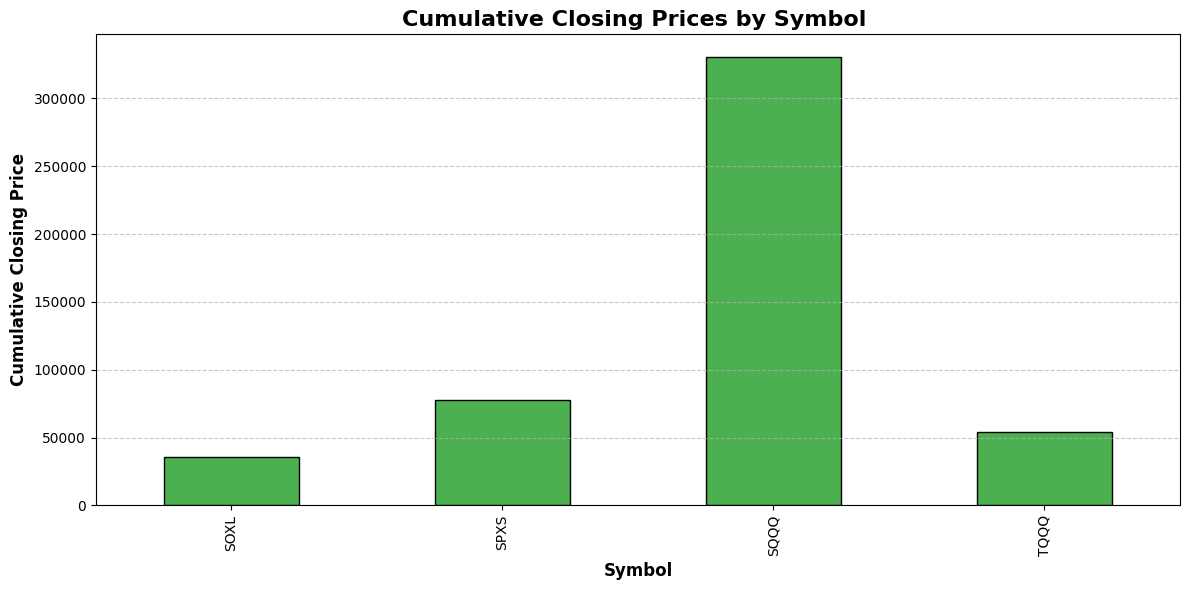

In [56]:
# data_limited = data.head()

# Calculate total closing price per symbol for the limited dataset
symbol_totals = data.head(5000).groupby('Symbol')['Close'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
symbol_totals.plot(kind='bar', color='#4CAF50', edgecolor='black')

# Add labels and title
plt.xlabel('Symbol', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Closing Price', fontsize=12, fontweight='bold')
plt.title('Cumulative Closing Prices by Symbol ', fontsize=16, fontweight='bold')

# Show the grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()

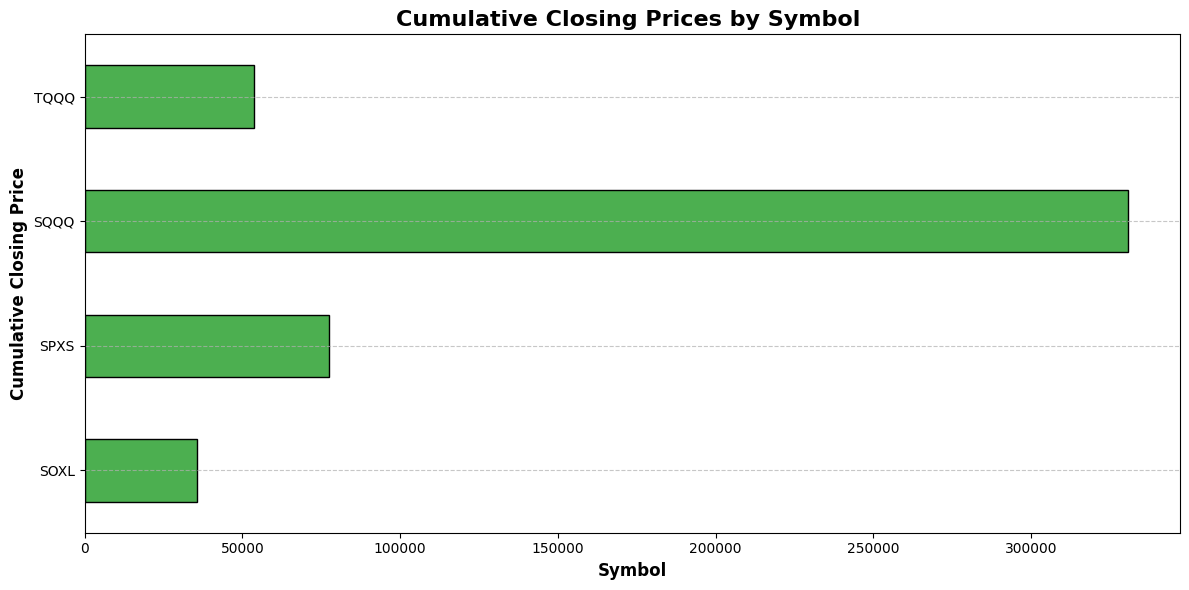

In [54]:
data_limited = data.head(5000)

# Calculate total closing price per symbol for the limited dataset
symbol_totals = data_limited.groupby('Symbol')['Close'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
symbol_totals.plot(kind='barh', color='#4CAF50', edgecolor='black')

# Add labels and title
plt.xlabel('Symbol', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Closing Price', fontsize=12, fontweight='bold')
plt.title('Cumulative Closing Prices by Symbol ', fontsize=16, fontweight='bold')

# Show the grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()

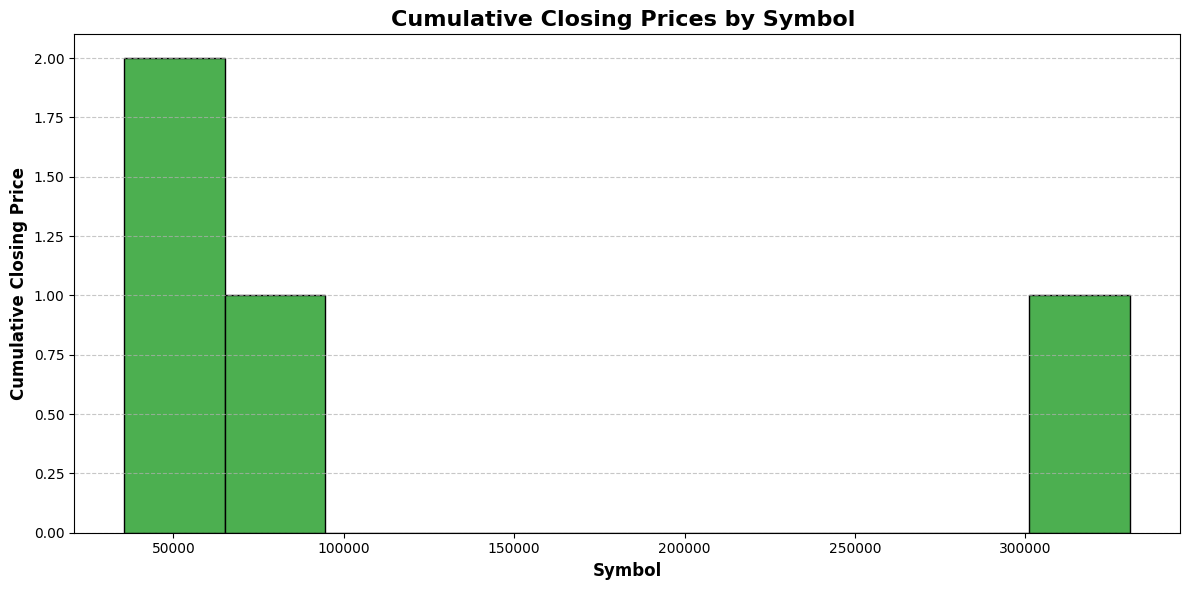

In [68]:
data_limited = data.head(5000)

# Calculate total closing price per symbol for the limited dataset
symbol_totals = data_limited.groupby('Symbol')['Close'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
symbol_totals.plot(kind='hist', color='#4CAF50', edgecolor='black')

# Add labels and title
plt.xlabel('Symbol', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Closing Price', fontsize=12, fontweight='bold')
plt.title('Cumulative Closing Prices by Symbol ', fontsize=16, fontweight='bold')

# Show the grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\3277458133.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



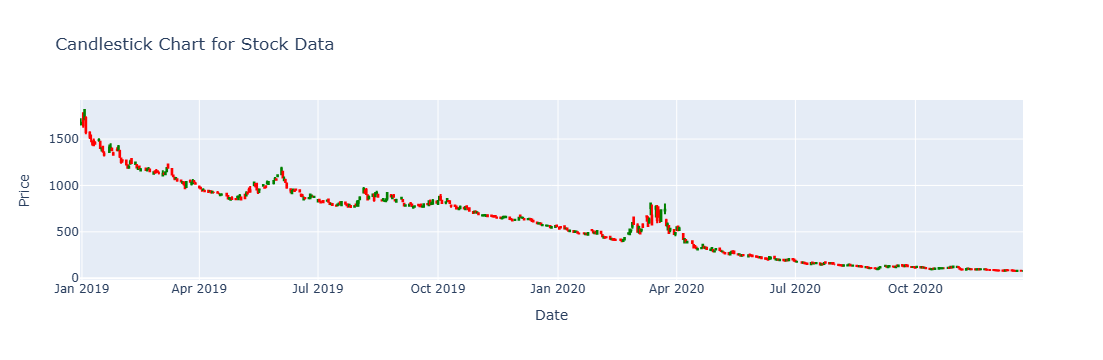

In [84]:
import pandas as pd
import plotly.graph_objects as go


# Limit the data to the first 1000 records
data_limited = data.head(500)

# Convert 'Date' to datetime if it's not already in datetime format
data_limited['Date'] = pd.to_datetime(data_limited['Date'])

# Create the Candlestick chart
fig = go.Figure(data=[go.Candlestick(
                x=data_limited['Date'],
                open=data_limited['Open'],
                high=data_limited['High'],
                low=data_limited['Low'],
                close=data_limited['Close'],
                increasing_line_color='green', decreasing_line_color='red')])

# Add titles and labels
fig.update_layout(
    title='Candlestick Chart for Stock Data',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False  # Remove the range slider below the chart
)

# Show the chart
fig.show()


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\757611524.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



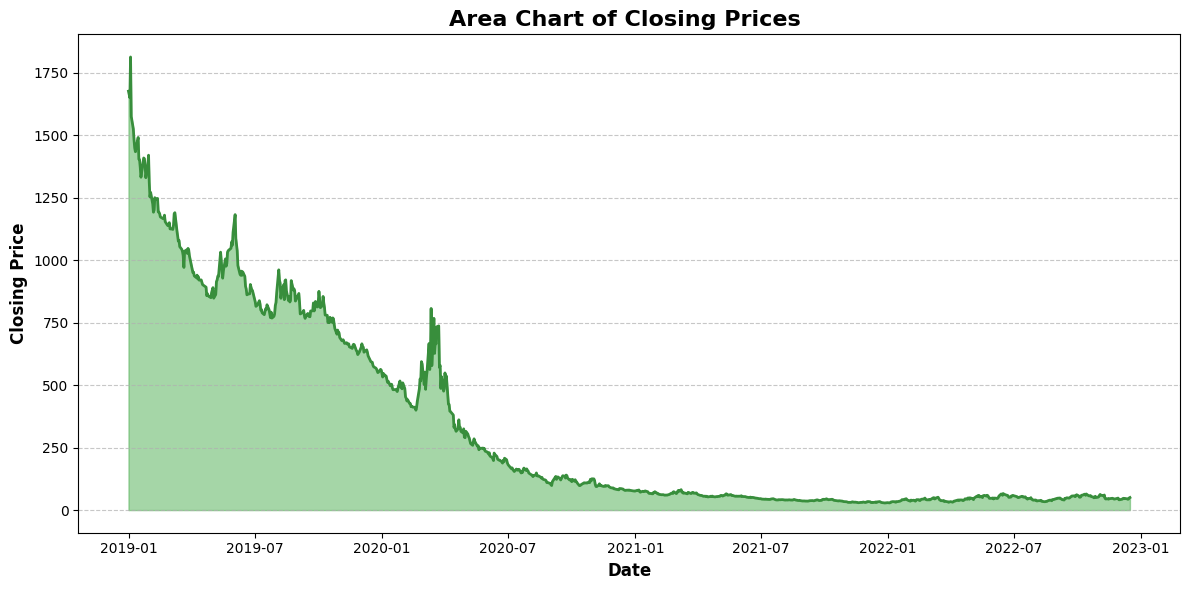

In [88]:
data_limited = data.head(1000)

# Convert 'Date' to datetime format if necessary
data_limited['Date'] = pd.to_datetime(data_limited['Date'])

# Plotting the Area Chart for the 'Close' price
plt.figure(figsize=(12, 6))
plt.fill_between(data_limited['Date'], data_limited['Close'], color='#4CAF50', alpha=0.5)
plt.plot(data_limited['Date'], data_limited['Close'], color='#388E3C', linewidth=2)  # Line over area

# Add titles and labels
plt.title('Area Chart of Closing Prices ', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Closing Price', fontsize=12, fontweight='bold')

# Display the grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\3086661929.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\3086661929.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\3086661929.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

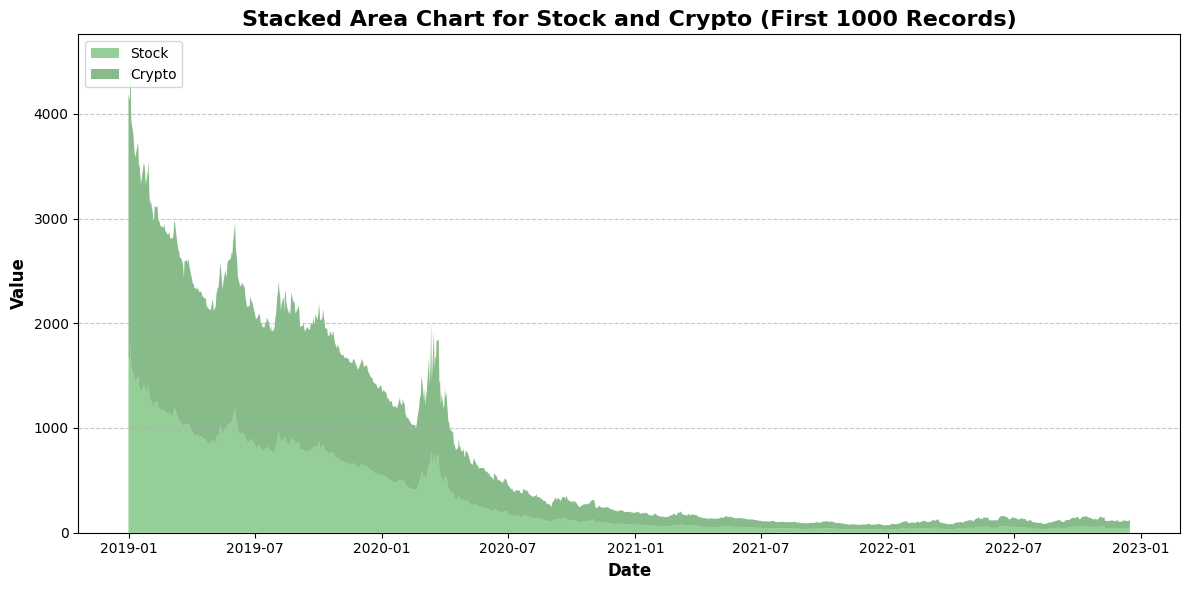

In [90]:
data_limited = data.head(1000)

# Convert 'Date' to datetime format if necessary
data_limited['Date'] = pd.to_datetime(data_limited['Date'])

# Let's assume you have separate columns for Stock and Crypto values (Close price for each)
# For this example, I am just taking "Close" values for Stock and Crypto; modify based on actual data

# Creating some mock columns for demonstration
data_limited['Stock'] = data_limited['Close']  # For example, use 'Close' for Stock
data_limited['Crypto'] = data_limited['Close'] * 1.5  # Simulating Crypto data

# Plotting the Stacked Area Chart
plt.figure(figsize=(12, 6))

plt.stackplot(data_limited['Date'], 
              data_limited['Stock'], 
              data_limited['Crypto'], 
              labels=['Stock', 'Crypto'], 
              colors=['#4CAF50', '#388E3C'], 
              alpha=0.6)

# Add titles and labels
plt.title('Stacked Area Chart for Stock and Crypto (First 1000 Records)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=12, fontweight='bold')
plt.legend(loc='upper left')

# Display the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\3282196730.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



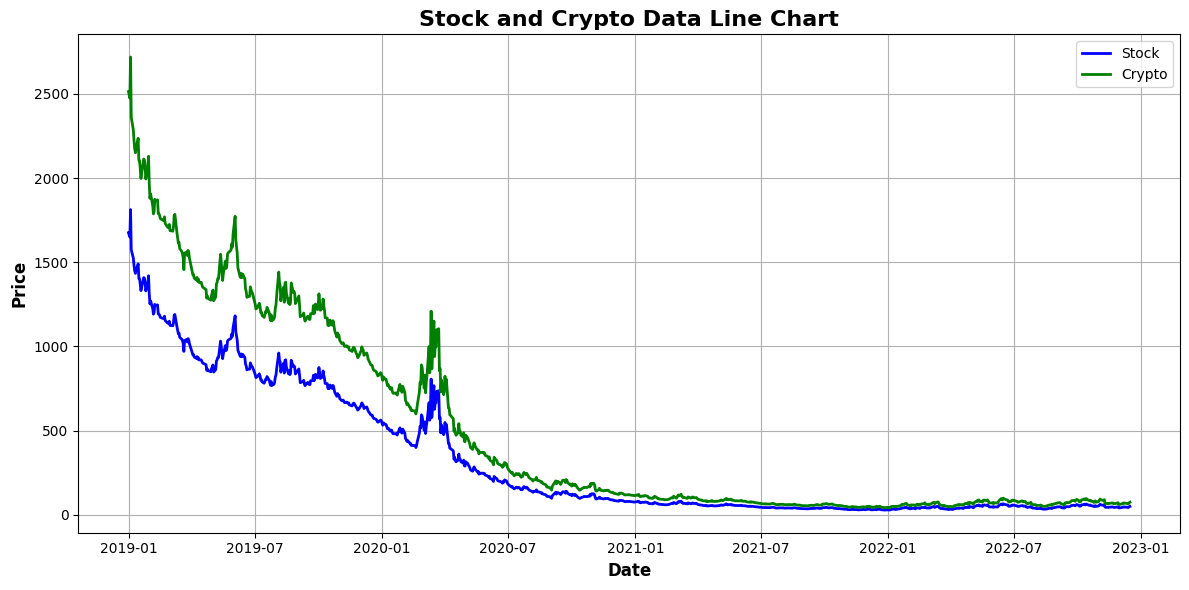

In [92]:
# Limit the data to the first 1000 records
data_limited = data.head(1000)

# Convert 'Date' to datetime format if necessary
data_limited['Date'] = pd.to_datetime(data_limited['Date'])

# Plotting the Line Chart for Stock and Crypto
plt.figure(figsize=(12, 6))

# Plot for Stock
plt.plot(data_limited['Date'], data_limited['Close'], label='Stock', color='blue', linewidth=2)

# Plot for Crypto (Here, assuming Crypto is 1.5 times the Close price for illustration)
plt.plot(data_limited['Date'], data_limited['Close'] * 1.5, label='Crypto', color='green', linewidth=2)

# Add titles and labels
plt.title('Stock and Crypto Data Line Chart', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

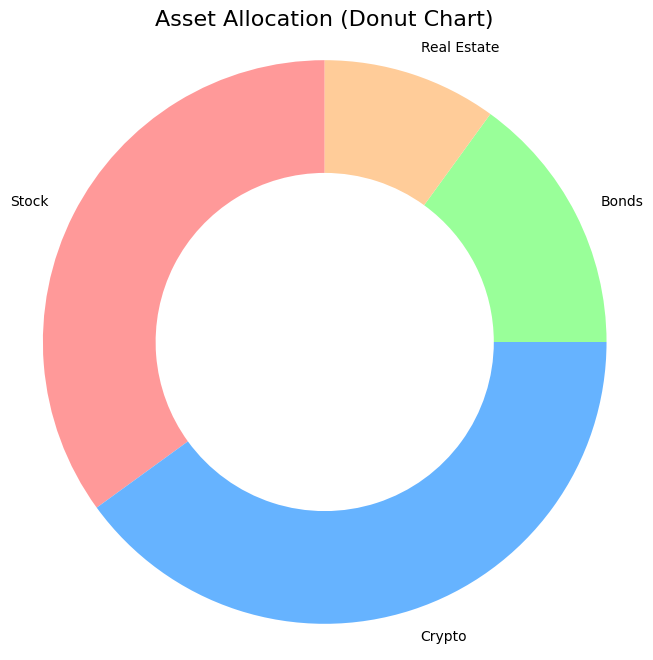

In [94]:
# Sample Data (For illustration, you can replace this with your actual data)
labels = ['Stock', 'Crypto', 'Bonds', 'Real Estate']
sizes = [35, 40, 15, 10]  # Corresponding values for each label
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Colors for each sector

# Plotting the Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart, with a 'donut' style (wedge of the pie chart is cut out)
ax.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.4})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Adding Title
plt.title('Asset Allocation (Donut Chart)', fontsize=16)

# Display the chart
plt.show()

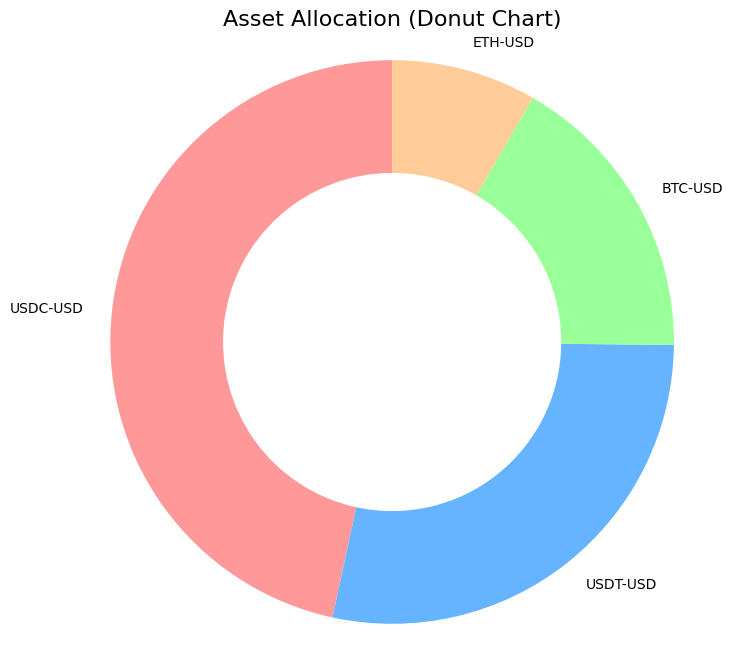

In [100]:
# print(data.head())

# Assuming your data has a 'Category' and 'Value' columns, 
# you'll need to group or aggregate data based on the category (e.g., 'Stock', 'Crypto', etc.)
# Let's say you're interested in the 'Symbol' column for categories and 'Volume' for values

# Aggregate the data (sum by 'Symbol')
aggregated_data = data.groupby('Symbol')['Volume'].sum().reset_index()

# Sorting the data to make the chart easier to read (optional)
aggregated_data = aggregated_data.sort_values(by='Volume', ascending=False)

# Select the top categories for visualization (e.g., top 4)
top_categories = aggregated_data.head(4)

# Extracting the labels and values for the Donut Chart
labels = top_categories['Symbol']
sizes = top_categories['Volume']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # You can adjust colors as needed

# Plotting the Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart, with a 'donut' style (wedge of the pie chart is cut out)
ax.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.4})

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Adding Title
plt.title('Asset Allocation (Donut Chart)', fontsize=16)

# Display the chart
plt.show()

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_32388\424229457.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



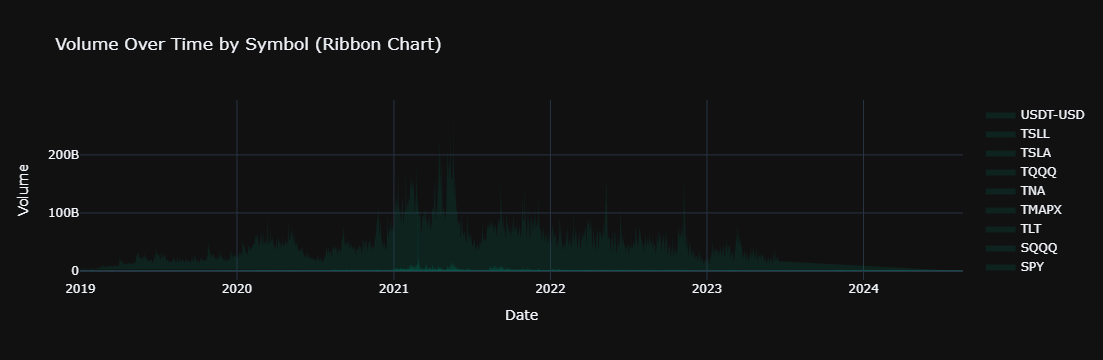

In [106]:
df=data.head(50000)
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data so that we have each 'Symbol' as columns and 'Date' as the index
pivot_df = df.pivot_table(index='Date', columns='Symbol', values='Volume', aggfunc='sum')

# Sort the data by date (optional, if your data isn't sorted already)
pivot_df = pivot_df.sort_index()

# Create a Ribbon Chart using Plotly
fig = go.Figure()

# Loop over each symbol (category) in the data and add a trace for it
for symbol in pivot_df.columns:
    fig.add_trace(go.Scatter(
        x=pivot_df.index,
        y=pivot_df[symbol],
        mode='lines',
        name=symbol,
        fill='tonexty',  # This creates the ribbon effect
        fillcolor='rgba(0,100,80,0.2)',  # Customize the color of the ribbon
        line=dict(width=0)  # Remove the line if you only want to show the ribbon
    ))

# Customize the layout
fig.update_layout(
    title='Volume Over Time by Symbol (Ribbon Chart)',
    xaxis_title='Date',
    yaxis_title='Volume',
    template='plotly_dark',  # Optional dark theme
    showlegend=True
)

# Show the chart
fig.show()


In [ ]:
# Here's an overview of the different types of charts we've covered today and how they
# can be used for visualizing stock and crypto data (or similar data) with the help of Python 
# libraries such as Matplotlib, Plotly, and Pandas:
# 1. Line Chart
# Use Case: Line charts are used to track changes over a period of time. In the context of stock and crypto data, you can visualize price movements over time (e.g., daily closing prices).

# Key Features:

# Displays trends clearly.
# Useful for time-series data.
# 2. Stacked Line Chart
# Use Case: Stacked line charts display multiple trends over time and show the contribution of each category to the total.

# Key Features:

# Tracks several series on the same chart.
# Good for comparing the part-to-whole relationships across time.
# 3. Pie Chart
# Use Case: Pie charts are used to show the proportions of categories in a whole (like market share or asset allocation).

# Key Features:

# Visualizes percentage distribution.
# Easy to read and compare categories.

# 4. Bar Chart
# Use Case: Bar charts are great for comparing quantities across different categories (e.g., comparing the volume of different assets).

# Key Features:

# Displays discrete values.
# Ideal for comparisons between categories.

# 5. Histogram
# Use Case: Histograms show the frequency distribution of numerical data, such as the distribution of stock or crypto prices over time.

# Key Features:

# Displays the distribution of data points.
# Helpful in understanding the spread and concentration of values.

# 6. Candlestick Chart
# Use Case: Candlestick charts are commonly used in financial markets to show the open, high, low, and close values for stocks and crypto.

# Key Features:

# Displays open, high, low, and close values.
# Commonly used for trading analysis.

# 7. Area Chart
# Use Case: Area charts are used to represent quantities over time, similar to line charts, but the area beneath the line is filled to visualize volume or magnitude.

# Key Features:

# Highlights the volume beneath trends.
# Useful for understanding the size of the trend over time.

# 8. Stacked Area Chart
# Use Case: A stacked area chart is used to visualize multiple trends over time, with the areas stacked on top of each other to show the cumulative contribution of each category.

# Key Features:

# Shows relative contribution to the total across time.
# Useful for comparing multiple categories over a time period.

# 9. Line and Clustered Chart
# Use Case: A combination of a line chart and a clustered bar chart is useful for comparing multiple metrics at once.

# Key Features:

# Combines line and bar charts for comparison.
# Ideal for multiple variables.


# 10. Donut Chart
# Use Case: Donut charts are essentially pie charts with a hole in the middle, used for showing proportions (e.g., asset allocation).

# Key Features:

# A variation of pie chart with a hollow center.
# Aesthetic way of representing proportions.


# 11. Ribbon Chart
# Use Case: Ribbon charts are used to visualize how categories change relative to each other over time, showing how each category contributes over time.

# Key Features:

# Uses colored ribbons to show changes in categories over time.
# Great for comparing multiple categories and their variations.


# Conclusion
# Matplotlib is great for basic charts like line, bar, pie, and histograms.
# Plotly is better for interactive and advanced charts like candlestick, ribbon, and complex time-series visualizations.
# Each chart type has its unique use case, making it easier to analyze and present data depending on what aspect you're focusing on (e.g., time trends, category comparisons, or distribution).
# You can integrate these visualizations into presentations or dashboards for better insights and communication of your stock or crypto data. If you need to automate this process for multiple visualizations, these charts can be generated programmatically with Python and embedded in reports or Power BI.


